# Lektion 6 - Introduktion till deep learning-ramverk

**Assignment: Tensors and a tiny neural network**

Instructions:
1. Choose PyTorch or Keras
2. Keep the model small and run quickly
3. Explain what each block does

## Task 1: Tensor operations
Create and manipulate tensors to understand shapes and broadcasting.

In [1]:
# TODO: Create a tensor with shape (2, 3)
import torch

tensor = torch.randn(2, 3)
print("Tensor shape:", tensor.shape)
print(tensor)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/andreas/ML-Frameworks/ML-Frameworks/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/andreas/ML-Frameworks/ML-Frameworks/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/andreas/ML-Frameworks/ML-Frameworks/.venv/lib/python3.11/site-packages/ipykernel/

Tensor shape: torch.Size([2, 3])
tensor([[ 1.9610,  0.1364, -1.5343],
        [-0.1274,  0.4002, -0.3167]])


In [2]:
# TODO: Reshape to (3, 2)
reshaped_tensor = tensor.reshape(3, 2)
print("Reshaped tensor shape:", reshaped_tensor.shape)
print(reshaped_tensor)

Reshaped tensor shape: torch.Size([3, 2])
tensor([[ 1.9610,  0.1364],
        [-1.5343, -0.1274],
        [ 0.4002, -0.3167]])


In [3]:
# TODO: Demonstrate broadcasting with another tensor
other_tensor = torch.ones(2)  # Shape (2,)
print("Other tensor:", other_tensor)
broadcasted_sum = reshaped_tensor + other_tensor  # Broadcasts other_tensor to shape (3, 2)
print("Broadcasted sum shape:", broadcasted_sum.shape)
print(broadcasted_sum)

Other tensor: tensor([1., 1.])
Broadcasted sum shape: torch.Size([3, 2])
tensor([[ 2.9610,  1.1364],
        [-0.5343,  0.8726],
        [ 1.4002,  0.6833]])


## Task 2: Build a tiny neural network
Keep the model small and runnable.

In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: mps


In [5]:
# TODO: Use MNIST or iris (flattened)
from torchvision import datasets, transforms

# Transformen nedan gör att datat kommer på en form som i vill ha den
# Detta är valfritt, och kan göras senare
# För alla dataset, finns det bra sätt att normalisera. MEN, vi kan behöva
# hitta mean och standardavvikelse själva
# För kända dataset kan ni ofta hitta värdena i anslutning till datan.
# 0.1307 är mean, 0.3081 är std för MNIST. 
# Vi normaliserar för att vikterna faktiskt ska ha påverkan på resultat
# LÄS EXTRA: (Vanishing och exploding gradients)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Nedan hämtar vi först tränings-, sedan testdata. 
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [6]:
train_data.data[0].float()

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,

In [7]:
import pandas as pd
import numpy as np

# Make the trainig data into a dataframe, and show the first few rows
df = pd.DataFrame(train_data.data.tolist())
print(df.head())

                                                  0   \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                  1   \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                  2   \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
# Flatten 28x28 -> 784, and stack into tensors

# Vår data är bilder. Bilderna är 28x28 pixlar stora.
# Vårt neurala nätverk vill ha datan på vektorform
# ALLTSÅ: vi behöver platta ut bilderna.
# Vi gör de till 784x1 stor vektor istället.
# En rad per pixel

# Vi delar också värdena med 255, för att får ned vårt största värde till 1.
X_train = train_data.data.float() / 255.0
y_train = train_data.targets
X_test = test_data.data.float() / 255.0
y_test = test_data.targets

# Normalize (optional, often helps)
X_train = (X_train - 0.1307) / 0.3081
X_test = (X_test - 0.1307) / 0.3081

X_train_flat = X_train.reshape(X_train.size(0), -1)  # (60000, 784)
X_test_flat = X_test.reshape(X_test.size(0), -1)     # (10000, 784)

# Move data to device (model will be moved below)
X_train_flat = X_train_flat.to(device)
y_train = y_train.to(device)
X_test_flat = X_test_flat.to(device)
y_test = y_test.to(device)

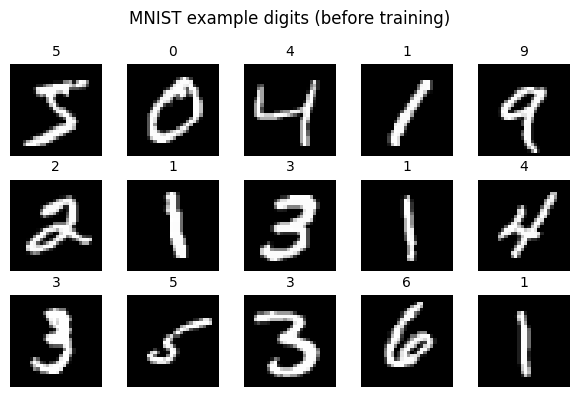

In [9]:
# BONUS: Vi plottar några bilder bara för att kika!

import matplotlib.pyplot as plt

# ----- Visualization BEFORE: example digits from MNIST -----
fig, axes = plt.subplots(3, 5, figsize=(6, 4))
for i, ax in enumerate(axes.flat):
    img = train_data.data[i].tolist()  # .tolist() avoids NumPy 2.x / PyTorch interop issues
    ax.imshow(img, cmap="gray")
    ax.set_title(str(train_data.targets[i].item()), fontsize=10)
    ax.axis("off")
plt.suptitle("MNIST example digits (before training)", fontsize=12)
plt.tight_layout()

In [10]:
# TODO: Build a model with:
# - 1 hidden layer (ReLU)
# - output layer (softmax or sigmoid)

In [11]:
# TODO: Train for a few epochs and print accuracy

## Task 3: Compare APIs
Reflect on the differences between PyTorch and Keras.

In [12]:
# TODO: Write 4-6 comment lines on:
# - where PyTorch feels lower level
# - where Keras feels higher level

In [13]:
print("Done! You built and trained a simple neural network.")

Done! You built and trained a simple neural network.
